In [1]:
# Bibliotecas
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

!pip install -q shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.6 MB/s eta 0:00:00


In [2]:
# Carregar o conjunto California
california_housing = fetch_california_housing()
X = california_housing.data  # Var. independetes
# Y = california_housing.target  # Var. dependente
Y = california_housing.target * 100000 # Var. dependente em US$

# Attribute Information:
#    - MedInc        median income in block group
#    - HouseAge      median house age in block group
#    - AveRooms      average number of rooms per household
#    - AveBedrms     average number of bedrooms per household
#    - Population    block group population
#    - AveOccup      average number of household members
#    - Latitude      block group latitude
#    - Longitude     block group longitude

# The target variable is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

# print(X)
# print(Y)

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

(20640, 8)
(20640,)


In [ ]:
# Plot das variáveis independentes e reposta
plt.figure(figsize=(9, 6))

for i in range(X.shape[1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(X[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(california_housing.feature_names[i])

plt.subplot(3, 3, X.shape[1] + 1)
plt.hist(Y, bins=30, color='orange', edgecolor='black')
plt.title("Target Variable")

plt.tight_layout()
plt.show()

In [3]:
# Criar o modelo de regressão random forest
rf_regressor = RandomForestRegressor(n_estimators=10, max_depth=8, min_samples_split=2, min_samples_leaf=1, oob_score=True, random_state=42, verbose=1)

# Treinar usando o conjunto de treino
rf_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(max_depth=8, n_estimators=10, oob_score=True,
                      random_state=42, verbose=1)

In [4]:
# Prever os preços usando o conjunto de teste
Y_pred = rf_regressor.predict(X_test)

# Cálculo das métricas
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE [US$]:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("MAE [US$]:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R2", r2)

RMSE [US$]: 58184.568747351164
MAE [US$]: 40134.79432669184
R2 0.7441507165186858


In [7]:
# Prever os preços usando o conjunto OOB
Y_oob = rf_regressor.oob_prediction_

print(Y_train.shape)
print(Y_oob.shape)

# Cálculo das métricas
oob_rmse = np.sqrt(mean_squared_error(Y_train, Y_oob))
print("OOB RMSE [US$]:", oob_rmse)

oob_mae = mean_absolute_error(Y_train, Y_oob)
print("OOB MAE [US$]:", oob_mae)

oob_r2 = r2_score(Y_train, Y_oob)
print("OOB R2:", oob_r2)

(15480,)
(15480,)
OOB RMSE [US$]: 65028.31149059161
OOB MAE [US$]: 43308.458800427456
OOB R2: 0.6830822029907246


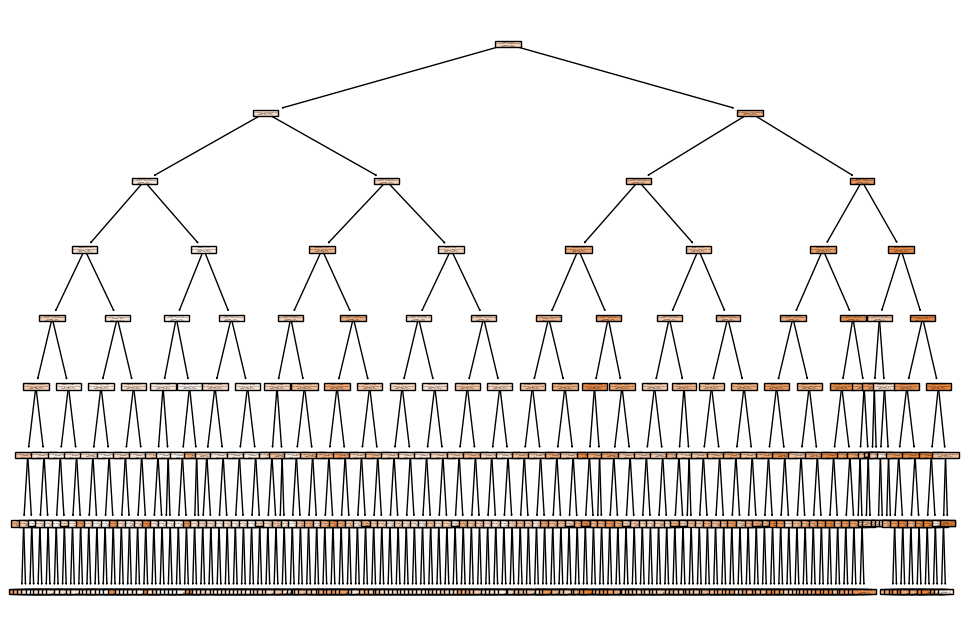

In [ ]:
# Visualização das árvores (escolher o número da árvore)
plt.figure(figsize=(12, 8))
plot_tree(rf_regressor.estimators_[0], feature_names=california_housing.feature_names, filled=True)
plt.show()

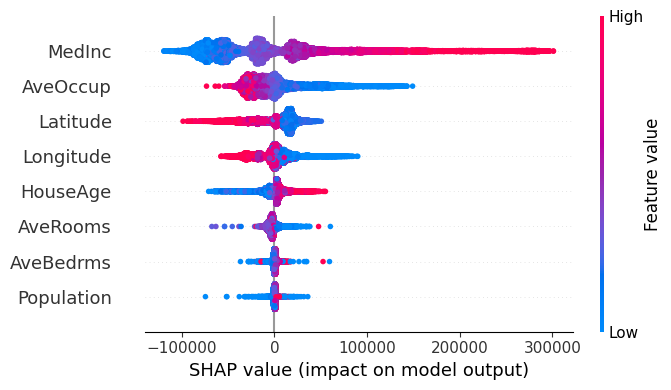

In [ ]:
# Interpretação do modelo usando SHAP
explainer = shap.TreeExplainer(rf_regressor)

# Cáculo dos valores SHAP
shap_values = explainer.shap_values(X)

# Visualização (resumo)
shap.summary_plot(shap_values, X, feature_names=california_housing.feature_names, plot_size=[7, 4])

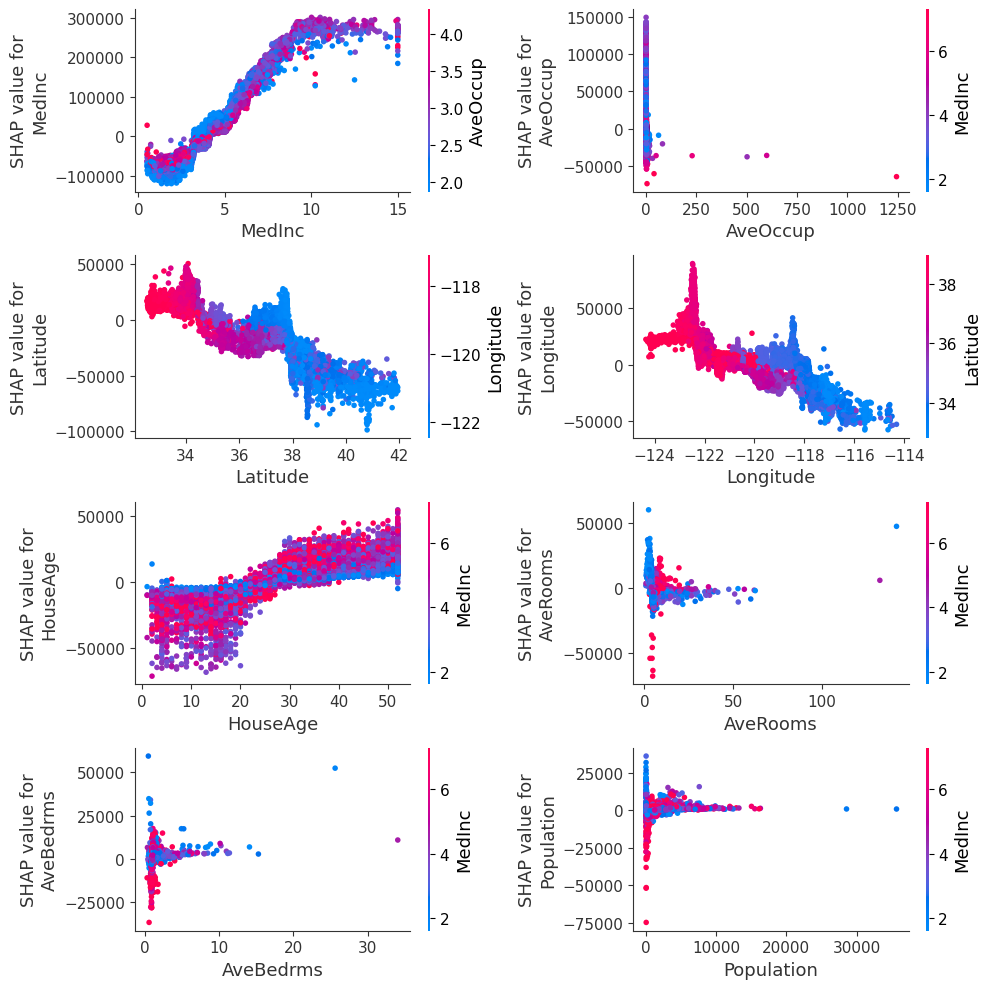

In [ ]:
# Visualização (gráficos de dependência)

# Ordenar as variáveis por ordem de importância
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(top_inds):
    shap.dependence_plot(top_inds[i], shap_values, X, ax=axes[i], feature_names=california_housing.feature_names, show=False)

plt.tight_layout()
plt.show()